In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_digits

In [3]:
mnist=load_digits()

In [4]:
x=np.array(mnist.images)
y=np.array(mnist.target)

In [5]:
class_name=["zero","one","two","three","four","five","six","seven","eight","nine"]

Text(0.5, 0, 'zero')

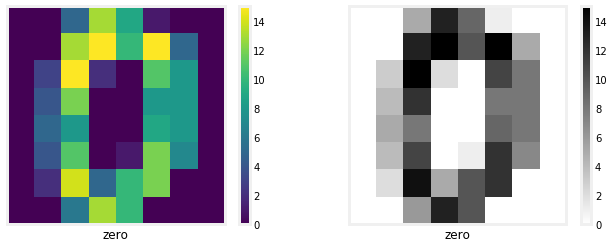

In [6]:
i=0
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(x[i])
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[y[i]])
plt.subplot(1,2,2)
plt.imshow(x[i],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[y[i]])

In [7]:
x=x/14

Text(0.5, 0, 'two')

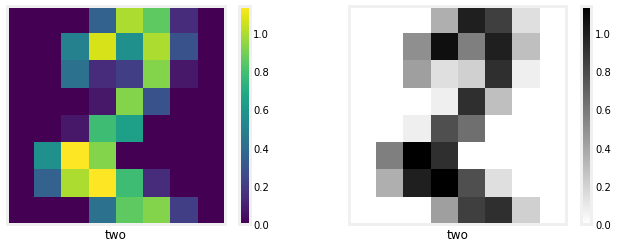

In [8]:
i=50
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(x[i])
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[y[i]])
plt.subplot(1,2,2)
plt.imshow(x[i],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[y[i]])

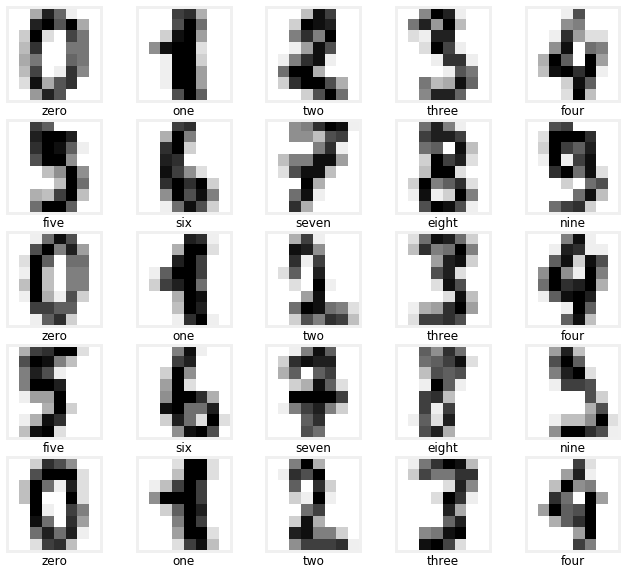

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.imshow(x[i],cmap=plt.cm.binary)
    plt.xlabel(class_name[y[i]])
plt.show()

In [10]:
nsamples=len(x)
x=x.reshape((nsamples,-1))

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [12]:
x_train,y_train,x_test,y_test=x[:1300],y[:1300],x[1300:],y[1300:]
shuffle_index=np.random.permutation(1300)
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

In [13]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [14]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print("cross validation accuracy ",end=" ")
print(cross_val_score(knn,x_train,y_train,cv=13).mean())

[[48  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 1  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 47  0  1  0  1  1  0]
 [ 0  0  0  0 48  0  0  0  1  2]
 [ 0  0  0  0  0 50  1  0  0  0]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  2  0  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  2  0  0  0 47]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.96      1.00      0.98        50
           2       0.98      0.98      0.98        48
           3       0.98      0.92      0.95        51
           4       0.98      0.94      0.96        51
           5       0.94      0.98      0.96        51
           6       0.98      1.00      0.99        51
           7       0.98      1.00      0.99        50
           8       0.96      0.96      0.96        46
           9       0.96      0.94      0.95        50

    accuracy                           0.97       497
   macro avg       

In [15]:
def error(n):
    error_rate=[]
    for i in range(1,n):
         knn=KNeighborsClassifier(n_neighbors=i)
         knn.fit(x_train,y_train)
         y_pred=knn.predict(x_test)
         error_rate.append(np.mean(y_pred!=y_test))
    plt.figure(figsize=(10,6))
    plt.plot(range(1,n),
             error_rate,color='blue',
             linestyle='dashed',
             marker='o',
             markersize=10,
             markerfacecolor='red')
    plt.xlabel("n neigbours")
    plt.ylabel("error rate")
    plt.show

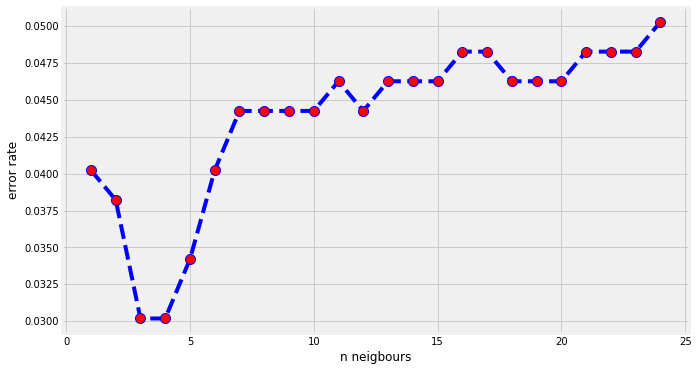

In [16]:
error(25)